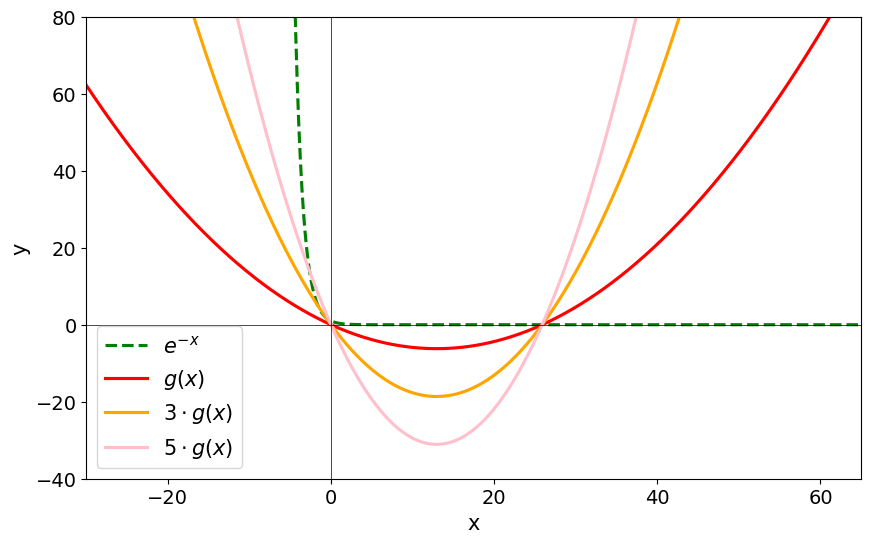

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.exp(-x)

def g(x):
    return -0.9603 * x + 0.0371 * x**2

def h(x):
    return 3 * (-0.9603 * x + 0.0371 * x**2)

def p(x):
    return 5 * (-0.9603 * x + 0.0371 * x**2)

# Generate x values
x_values = np.linspace(-30, 65, 1000)

# Generate y values for each function
y_values_f = f(x_values)
y_values_g = g(x_values)
y_values_h = h(x_values)
y_values_p = p(x_values)

plt.figure(figsize=(10, 6))

# Plot function f(x)
plt.plot(x_values, y_values_f, label=r'$e^{-x}$',linestyle='--', color='green', linewidth=2.25)

# Plot functions g(x), h(x), and p(x)
plt.plot(x_values, y_values_g, label=r'$g(x)$',  color='red', linewidth=2.25)
plt.plot(x_values, y_values_h, label=r'$3 \cdot g(x)$',  color='orange', linewidth=2.25)
plt.plot(x_values, y_values_p, label=r'$5 \cdot g(x)$',  color='pink', linewidth=2.25)

plt.xticks(fontsize=14)  # Replace x-values with instance names
plt.yticks(fontsize=14) 
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xlim(-30, 65)
plt.ylim(-40, 80)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend(fontsize=15)
plt.grid(False)
plt.show()


2.625 + 6.0978836 x + 0.44642857 x**2 - 4.62962963 x**3
Polynomial coefficients (low to high order): [ 2.625       6.0978836   0.44642857 -4.62962963]
0.0 + 6.5625 x + 7.6223545 x**2 + 0.37202381 x**3 - 2.89351852 x**4
Integrated polynomial coefficients (low to high order): [ 0.          6.5625      7.6223545   0.37202381 -2.89351852]


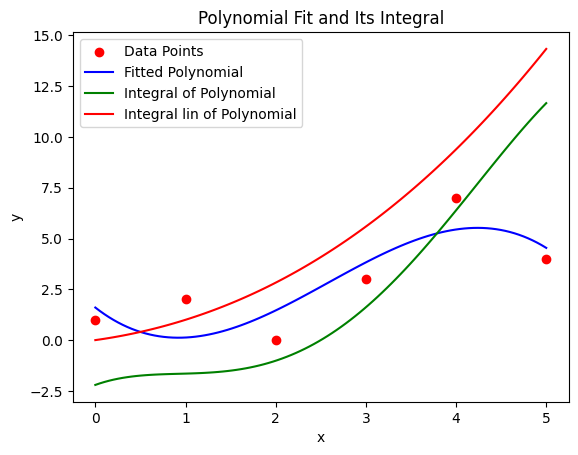

In [2]:
# Execute the provided code to fit the polynomial and find its integral

import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Sample data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 2, 0, 3, 7, 4])

# Fit a polynomial of degree 5
p = Polynomial.fit(x, y, 3)
print(p)

# Print the polynomial coefficients
print("Polynomial coefficients (low to high order):", p.coef)

# Integrate the polynomial
p_integ = p.integ()
print(p_integ)

# Print the integrated polynomial coefficients
print("Integrated polynomial coefficients (low to high order):", p_integ.coef)

# Create a sequence of 100 points for plotting the fitted polynomial and its integral
x_fit = np.linspace(0, 5, 100)
y_fit = p(x_fit)
y_integ = p_integ(x_fit)

new_p = Polynomial([p_integ.coef[0], p_integ.coef[1], 0.5*p_integ.coef[2], 0.5*p_integ.coef[3]]) 
s_0 = new_p(0)
s_1 = new_p(1)
def scaled_polynomial(t):
    return (new_p(t) - s_0) / (s_1 - s_0)
y_lin = scaled_polynomial(x_fit)

# Plot the data points, fitted polynomial, and its integral
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x_fit, y_fit, color='blue', label='Fitted Polynomial')
plt.plot(x_fit, y_integ, color='green', label='Integral of Polynomial')
plt.plot(x_fit, y_lin, color='red', label='Integral lin of Polynomial')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fit and Its Integral')
plt.show()


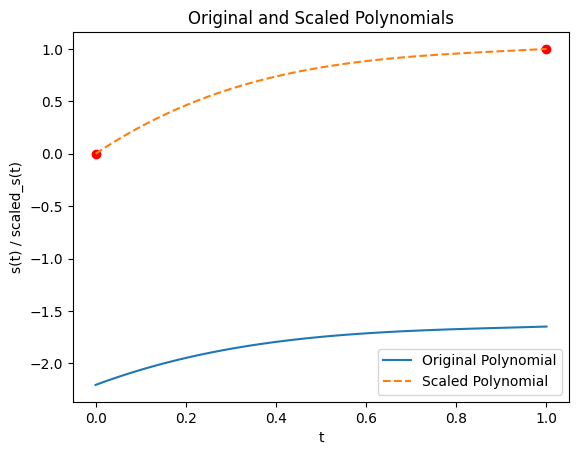

scaled_polynomial(0) = 0.0
scaled_polynomial(1) = 1.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial


# Evaluate the polynomial at the endpoints
s_0 = p_integ(0)
s_1 = p_integ(1)

# Define the scaled polynomial
def scaled_polynomial(t):
    return (p_integ(t) - s_0) / (s_1 - s_0)

# Create a sequence of points for plotting
t_fit = np.linspace(0, 1, 100)
y_fit = p_integ(t_fit)
y_scaled_fit = scaled_polynomial(t_fit)

# Plot the original polynomial and the scaled polynomial
plt.plot(t_fit, y_fit, label='Original Polynomial')
plt.plot(t_fit, y_scaled_fit, label='Scaled Polynomial', linestyle='--')
plt.scatter([0, 1], [scaled_polynomial(0), scaled_polynomial(1)], color='red')  # Points at t=0 and t=1
plt.legend()
plt.xlabel('t')
plt.ylabel('s(t) / scaled_s(t)')
plt.title('Original and Scaled Polynomials')
plt.show()

# Verify the scaled polynomial at the endpoints
print("scaled_polynomial(0) =", scaled_polynomial(0))  # Should print 0
print("scaled_polynomial(1) =", scaled_polynomial(1))  # Should print 1
